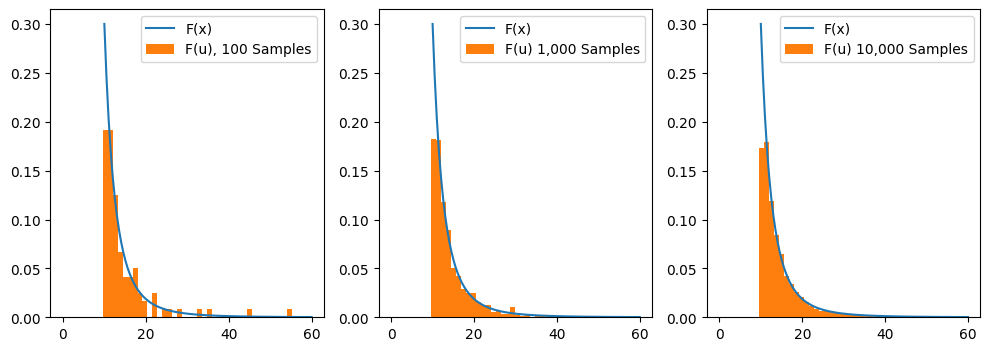

In [36]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import time

## HW 2 Problem 1

x0 = 10
gm = 4
r1 = 100
r2 = 1000
r3 = 10000

x = np.linspace( x0, 60, 100 )
Fx = -1*(1-gm)/(x0**(1-gm))*x**(-gm)

u1 = [ random.random() for i in range(0,r1) ]
x1 = [  x0 * (1 - u1[a])**( 1 / (1 - gm) ) for a in range(0,r1) ]

u2 = [ random.random() for i in range(0,r2) ]
x2 = [  x0 * (1 - u2[a])**( 1 / (1 - gm) ) for a in range(0,r2) ]

u3 = [ random.random() for i in range(0,r3) ]
x3 = [  x0 * (1 - u3[a])**( 1 / (1 - gm) ) for a in range(0,r3) ]


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, Fx, label='F(x)')
plt.hist( x1, bins=50, range=(0, 60), density=True, label="F(u), 100 Samples"  )

plt.legend()


plt.subplot(1, 3, 2)
plt.plot(x, Fx, label='F(x)')
plt.hist( x2, bins=50, range=(0, 60), density=True, label="F(u) 1,000 Samples"  )

plt.legend()


plt.subplot(1, 3, 3)
plt.plot(x, Fx, label='F(x)')
plt.hist( x3, bins=50, range=(0, 60), density=True, label="F(u) 10,000 Samples"  )

plt.legend()

plt.show()



In [58]:

## HW 2 Question 3b
def solveF( u, x0 ):
  x = []
  for s in range(0, len(u) ):
    x.append( x0 )
    for i in range(12):
      f = 1-(1+x[s])*math.exp(-x[s])-u[s]
      df = np.maximum( x[s]*math.exp(-x[s]), 1e-10 )


      xn = x[s] -f/df

      if( xn >= 0 ):
        x[s]= xn
      else:
        x[s]=1e-10
  return x

u = [ random.random() for i in range(0, 10**6)]



start = time.time()
x = solveF( u, 2.0 )
end = time.time()
print( f"Runtime: {end-start}")
print( x[0:10] )

Runtime: 32.8207950592041
[np.float64(3.2435769849240055), np.float64(2.668907385298374), np.float64(1.4897209114330316), np.float64(1.6962720140768877), np.float64(2.414591096672525), np.float64(1.008853739990959), np.float64(0.9291296642346263), np.float64(1.5769660035549407), np.float64(1.0032702642590419), np.float64(2.1525541608436356)]


In [59]:
## HW 2 Question 3c
k = 10*6
accepted = []
c = 4*math.exp(-1)
start = time.time()

while len( accepted ) < k:
  u1 = random.random()
  y = math.exp(-u1/2)/2
  u2 = random.random()
  rhs = (2*y*math.exp(-y/2))/c

  if( u2 <= rhs ):
    accepted.append( y )
end = time.time()

print( f"{end-start}" )



0.0003895759582519531


0.00030541419982910156


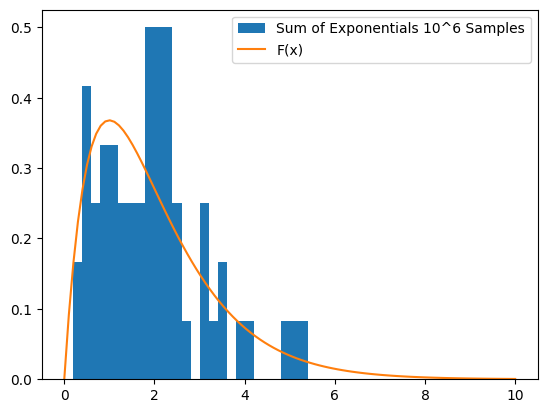

In [75]:
## HW 2 Question 3de
k = 10*6

start = time.time()
x = np.random.exponential(scale=1.0, size=k) +  np.random.exponential(scale=1.0, size=k)
end = time.time()

print( f"{end-start}" )

x1 = np.linspace( 0, 10, 100 )
Fx = x1*np.exp(-x1)

plt.hist( x, bins=50, range=(0, 10), density=True, label="Sum of Exponentials 10^6 Samples"  )
plt.plot(x1, Fx, label='F(x)')

plt.legend()

plt.show()